# 简单的分类器

In [38]:
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

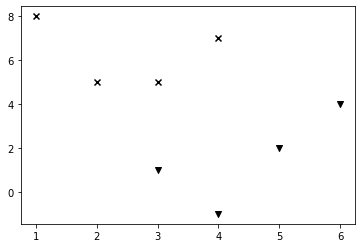

In [39]:
X = np.array([[3,1], [2,5], [1,8], [6,4], [5,2], [3,5], [4,7], [4,-1]]) 
y = [0, 1, 1, 0, 0, 1, 1, 0] 
class_0 = np.array([X[i] for i in range(len(X)) if y[i]==0])
class_1 = np.array([X[i] for i in range(len(X)) if y[i]==1])

plt.figure()
plt.scatter(class_0[:,0],class_0[:,1],c='black',marker="v")
plt.scatter(class_1[:,0],class_1[:,1],c='black',marker="x")

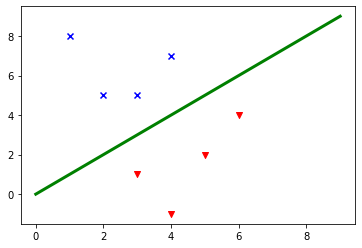

In [40]:
line_x = range(10)
line_y = line_x
plt.scatter(class_0[:,0],class_0[:,1],c='red',marker="v")
plt.scatter(class_1[:,0],class_1[:,1],c='blue',marker="x")
plt.plot(line_x,line_y,color='green',linewidth=3)

# 逻辑回归分类器

In [41]:
X = np.array([[4, 7], [3.5, 8], [3.1, 6.2], [0.5, 1], [1, 2],
[1.2, 1.9], [6, 2], [5.7, 1.5], [5.4, 2.2]])
Y = np.array([0, 0, 0, 1, 1, 1, 2, 2, 2]) 

In [45]:
classifier = linear_model.LogisticRegression(solver='liblinear',C=100)
classifier.fit(X,Y)

LogisticRegression(C=100, solver='liblinear')

<ipython-input-53-0f150d3fd42e>:16: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x_values, y_values, mesh_output, cmap=plt.cm.gray)


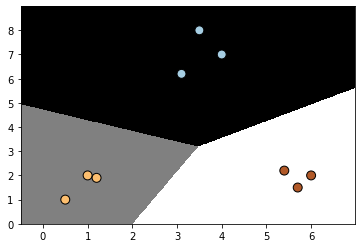

In [53]:
def plot_classifier(classifier, X, Y):
    # 定义图形的取值范围
    x_min, x_max = min(X[:, 0]) - 1.0, max(X[:, 0]) + 1.0
    y_min, y_max = min(X[:, 1]) - 1.0, max(X[:, 1]) + 1.0 
    # 设置网格数据的步长
    step_size = 0.01
    # 定义网格
    x_values, y_values = np.meshgrid(np.arange(x_min, x_max, step_size),np.arange(y_min, y_max, step_size))
    # 计算分类器输出结果
    mesh_output = classifier.predict(np.c_[x_values.ravel(), y_values.ravel()])
    # 数组维度变形
    mesh_output = mesh_output.reshape(x_values.shape) 
    # 用彩图画出分类结果
    plt.figure()
    # 选择配色方案
    plt.pcolormesh(x_values, y_values, mesh_output, cmap=plt.cm.gray) 
    plt.scatter(X[:, 0], X[:, 1], c=Y, s=80, edgecolors='black', linewidth=1,cmap=plt.cm.Paired) 
    
plot_classifier(classifier, X, Y)


# 朴素贝叶斯分类器

In [97]:
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection 

In [98]:
input_file = 'E://tensorflow//jupyter//machine_learing_damo//2.data//data_multivar.txt'

In [123]:
x = []
y = []

with open(input_file,'r') as f:
    for line in f.readlines():
        data = [float(x) for x in line.split(',')]
        x.append(data[:-1])
        y.append(data[-1])

x = np.array(x)
y = np.array(y)


[8.73, 0.31]
[4.71, -0.42]
[4.58, 6.18]
[9.38, 2.18]
[4.78, 5.28]
[1.22, 2.25]
[9.22, 1.14]
[5.61, -0.34]
[7.8, 0.51]
[1.98, 1.69]
[7.51, 1.76]
[0.95, 2.09]
[3.43, 0.24]
[4.74, 4.7]
[0.64, 1.52]
[4.2, -0.98]
[0.51, 2.65]
[3.94, -1.17]
[7.39, 0.41]
[4.19, -1.15]
[0.99, 2.97]
[1.62, 0.97]
[3.37, -0.68]
[4.76, 4.47]
[3.64, 4.34]
[9.18, 1.08]
[3.9, -1.3]
[4.0, -0.91]
[4.64, 6.39]
[7.24, 1.81]
[7.65, 0.1]
[9.18, 1.8]
[0.37, 2.04]
[8.95, 3.47]
[3.56, -0.12]
[3.85, -1.07]
[2.71, -0.26]
[3.88, -1.27]
[3.97, -0.67]
[2.1, 2.25]
[1.05, -0.03]
[6.77, 1.09]
[4.75, 4.55]
[8.51, 0.81]
[3.87, 5.82]
[1.81, 3.67]
[5.52, -0.99]
[4.38, -1.76]
[0.48, 2.17]
[8.32, 2.15]
[4.04, 5.94]
[8.57, 1.12]
[9.71, 1.79]
[3.97, -0.24]
[3.55, -0.13]
[9.38, -0.56]
[8.35, 1.0]
[0.58, 1.75]
[4.34, 4.91]
[3.66, -2.13]
[3.35, -1.37]
[0.85, 1.12]
[5.56, 5.46]
[3.86, -0.39]
[-0.01, 1.62]
[3.9, -1.21]
[4.23, -0.62]
[5.11, 4.9]
[4.12, -0.38]
[6.26, 4.24]
[3.37, -1.47]
[7.72, 3.1]
[9.07, 1.29]
[0.39, 0.85]
[6.21, 4.37]
[8.64, 0.89

In [102]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(x, y,test_size=0.25, random_state=5) 

classifier_gaussiannb = GaussianNB()
classifier_gaussiannb.fit(X_train, y_train)
y_pred = classifier_gaussiannb.predict(X_test)

<ipython-input-53-0f150d3fd42e>:16: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x_values, y_values, mesh_output, cmap=plt.cm.gray)


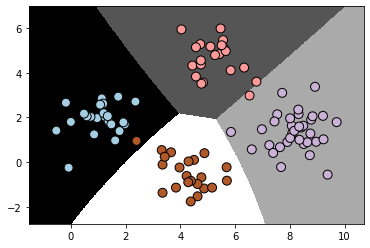

In [103]:
plot_classifier(classifier_gaussiannb,X_test,y_test)

In [110]:
accuracy = 100.0 * (y_test == y_pred).sum() /X_test.shape[0]
accuracy

98.0

# 交叉验证

In [112]:
num_validations = 5
accuracy = model_selection.cross_val_score(classifier_gaussiannb,x, y,scoring='accuracy', cv=num_validations)
print("Accuracy: " + str(round(100*accuracy.mean(), 2)) + "%" )

Accuracy: 99.5%


In [116]:
f1 = model_selection.cross_val_score(classifier_gaussiannb,x, y, scoring='f1_weighted', cv=num_validations)
print("F1: " + str(round(100*f1.mean(), 2)) + "%")
precision = model_selection.cross_val_score(classifier_gaussiannb,x, y, scoring='precision_weighted', cv=num_validations)
print("Precision: " + str(round(100*precision.mean(), 2)) + "%")
recall = model_selection.cross_val_score(classifier_gaussiannb,x, y, scoring='recall_weighted', cv=num_validations)
print("Recall: " + str(round(100*recall.mean(), 2)) + "%" )

F1: 99.5%
Precision: 99.52%
Recall: 99.5%
